# Simulation using Python 2
### Monte Carlo Simulation
[Numpy Random website](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html)

In [1]:
#Runs these import commands
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

**Scenario M1: Estimate PI**

Consider a quarter circle inscribed inside a unit square.  Radius of cirle is 1.

$Area_{quartercircle} = \pi /4$ and $Area_{square} = 1$

Now, suppose we randomly sample points, then $Area_{quartercircle} \approx \text{number_of_points_inside_circle}$

$\pi = 4*$ number_of_points_inside_circle / n


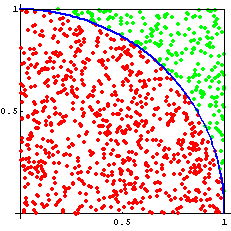


**Algorithm: **
```
for i in range(n):
  Generate x ~ Unif[0,1]
  Generate Y ~ Unif[0,1]
  if (x^2 + y^2) <=1:
    count_in_circle =  count_in_circle + 1

Estimate PI as 4*count_in_circle/n
```

In [15]:
#Write your code here
n=500
count_in_circle=0
for i in range(n):
  X = rnd.uniform(0,1)
  Y = rnd.uniform(0,1)
  if (X**2 + Y**2) <=1:
    count_in_circle += 1

pi = 4 * count_in_circle/n
print('Pi - Estimated value is', format(pi, '.4f'))

Pi - Estimated value is 3.1920


**Scenario M2** A project consists of three tasks: A, B and C. Task A and B can be done in parallel, while C can being only after A and B are completed. The time for task A, is exponentially distributed with mean 10 hours; the time for task B is uniformly distributed between 6 and 14 hours; and the time for task C, is normally distributed with mean 10 hours and std. dev. 3.
What is the probability that the project will be completed within 22 hours?

*Algorithm*
```
for i in range(n):
  Generate A ~ Expo(mean=10 hours)
  Generate B ~ Unif[6, 14]
  Generate C ~ Normal(mean=10, s.d=3)
  Totaltime = max(A,B) + C
  if Totaltime <= 22:
    count = count + 1
 
Estimate Probability as count /n
```

In [5]:
#Write your code here
n=500
count = 0
for i in range(n):
  A = rnd.exponential(10)
  B = rnd.uniform(6,14)
  C = rnd.normal(10,3)
  totaltime = max(A,B) + C
  if totaltime <= 22:
    count = count + 1
print("Probablity that the project will be completed within 22 hours is", format(count/n,'.4f'))

Probablity that the project will be completed within 22 hours is 0.4920


.**Scenario M3**

Consider the maze shown. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). When rat enters Cell i, he wanders around within the cell for Xi minutes where Xi is
Gamma(4, 3i) , and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially in Cell 1. Answer the following using Monte Carlo Simulation.

(a) Estimate the probability that the rat dies by poison.

(b) What is the expected duration the rat lives?

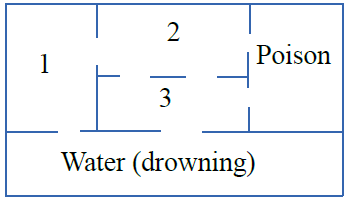

*Algorithm*
```
durations=[]
Poisoncount = 0

for i in range(n): #We will simulate rat movement for n rounds.
  currentCell=1
  timespent=0.0
  while (currentCell not in [4, 5]):
    timespent = timespent + Gamma(4,3*currentCell)
    if currentCell == 1:
      #choose cell 2 or 5 randomly  #5 can indicate Water cell
    elif currentCell == 2:
      #choose cell 1 or 3 or 4 #4 can indicate Poison cell
    else: #currentCell is 3
      #choose cell 2 or 4 or 5 
  
    if currentCell == 4:
      Poisoncount = Poisoncount+1

  durations.append(timespent)

##print the results
```


In [8]:
durations=[]
Poisoncount=0
n=1000
for i in range(n):
  currentCell = 1
  timespent = 0.0
  while (currentCell not in [4, 5]):
    gamma = np.random.gamma(4,3*currentCell)
    timespent = timespent + gamma
    if currentCell == 1:
      currentCell = rnd.choice([2,5]) # random choice between cell 2 or 5 (Water cell)
    elif currentCell == 2:
      currentCell = rnd.choice([1,3,4]) # random choice between cell 1,3 or 4 (Poison cell)
    else:  # Means  that the currentCell == 3
      currentCell = rnd.choice([2,4,5])
    
    if currentCell == 4:
      Poisoncount = Poisoncount+1

  durations.append(timespent)

print("The probablity that the rat dies by poison is:",format(Poisoncount/n,'.4f'))
print("")
print("The expected duration that the rat lives is:",format(np.sum(durations)/n,'0.4f'),'minutes')




The probablity that the rat dies by poison is: 0.2940

The expected duration that the rat lives is: 41.0118 minutes


**Exercise**

Newspaper vendor at a railway station buys newspaper at Rs. 3.50 and sells it at Rs.4.50. At the end of the day, the unsold newspapers are sold to raddhiwala for Rs.0.25. Estimate the expected profit if the vendor buys 40 newspapers.

Compare the results when:

*   Demand for newspaper is Poisson random variable with mean 50
*   Demand for newspaper is Normal random variable with mean 50 & s.d. 5

In [12]:
n = 1000
count = 0
ex_profit_poisson =[]
ex_profit_normal = []
for i in range(n):
  demand_poisson = rnd.poisson(50)
  demand_normal = rnd.normal(50, 5)
  if (demand_poisson <= 40):
    prof_p = demand_poisson * 4.5 -  40 * 3.5 + (40 - demand_poisson) * 0.25
  else:
    prof_p = 40 * 4.5 -  40 * 3.5

  if (demand_normal <= 40):
    prof_n = demand_normal * 4.5 -  40 * 3.5 + (40 - demand_normal) * 0.25
  else:
    prof_n = 40 * 4.5 -  40 * 3.5

  ex_profit_poisson.append(prof_p)
  ex_profit_normal.append(prof_n)  

print("The expected profit when the demand is Poisson with mean 50 is:",format(np.sum(ex_profit_poisson)/n,'0.4f'),'Rs') 
print("")
print("The expected profit when the demand is Normal with mean 50 and sd 5 is:",format(np.sum(ex_profit_normal)/n,'0.4f'),'Rs') 

The expected profit when the demand is Poisson with mean 50 is: 39.1075 Rs

The expected profit when the demand is Normal with mean 50 and sd 5 is: 39.8470 Rs
